<a href="https://colab.research.google.com/github/esraamosalman22-arch/ml_final_project-_E.J/blob/main/clasification_project_esra_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_auc_score
)

In [ ]:
orders = pd.read_csv('orders.csv')
order_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')


In [ ]:
df = pd.merge(order_train, orders, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df = pd.merge(df, aisles, on='aisle_id', how='left')
df = pd.merge(df, departments, on='department_id', how='left')


In [ ]:
print(df.shape)
df.head()

(1384617, 15)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [ ]:
print(df.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')


In [ ]:
#فقط للبيانات يلي نوعها numaric
df.describe()


,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01,1.031128e+05,1.709141e+01,2.701392e+00,1.357759e+01,1.706613e+01,7.130423e+01,9.839777e+00
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01,5.948715e+04,1.661404e+01,2.167646e+00,4.238458e+00,1.042642e+01,3.810409e+01,6.292830e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00,5.173200e+04,6.000000e+00,1.000000e+00,1.000000e+01,7.000000e+00,3.100000e+01,4.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00,1.029330e+05,1.100000e+01,3.000000e+00,1.400000e+01,1.500000e+01,8.300000e+01,8.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00,1.549590e+05,2.100000e+01,5.000000e+00,1.700000e+01,3.000000e+01,1.070000e+02,1.600000e+01
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,2.100000e+01


In [ ]:
#تجريب اذا في تكرار بهدول الاعمدة
df.duplicated(subset=['order_id', 'product_id','eval_set','order_number']).sum()


np.int64(0)

In [ ]:
print(df.isnull().sum())


order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64


In [ ]:
df.dtypes

,0
order_id,int64
product_id,int64
add_to_cart_order,int64
reordered,int64
user_id,int64
eval_set,object
order_number,int64
order_dow,int64
order_hour_of_day,int64
days_since_prior_order,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   user_id                 1384617 non-null  int64  
 5   eval_set                1384617 non-null  object 
 6   order_number            1384617 non-null  int64  
 7   order_dow               1384617 non-null  int64  
 8   order_hour_of_day       1384617 non-null  int64  
 9   days_since_prior_order  1384617 non-null  float64
 10  product_name            1384617 non-null  object 
 11  aisle_id                1384617 non-null  int64  
 12  department_id           1384617 non-null  int64  
 13  aisle                   1384617 non-null  object 
 14  de

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df['reordered'].value_counts()) #target column


reordered
1    828824
0    555793
Name: count, dtype: int64


In [ ]:
df["add_to_cart_order"].isnull().sum() #بدل على اولوية المنتج


np.int64(0)

In [ ]:
df['product_name'].value_counts()

,count
product_name,
Banana,18726
Bag of Organic Bananas,15480
Organic Strawberries,10894
Organic Baby Spinach,9784
Large Lemon,8135
...,...
Clear Complexion Daily Moisturizer,1
Classic Original Lip Balm SPF 12,1
Sprinkles Decors,1


In [ ]:
df['order_dow'].value_counts() #sunday the Most requested

,count
order_dow,
0,324026
6,207279
1,205978
5,176910
2,160562
4,155481
3,154381


In [ ]:
#أعلى عدد من الطلبات تم تسجيله عند الساعة 14:00 (الثانية ظهرًا)
df['order_hour_of_day'].value_counts()

,count
order_hour_of_day,
14,119370
15,116198
13,114762
11,114119
12,111752
10,110479
16,110237
17,96944
9,93856


In [ ]:
df['aisle'].value_counts()

,count
aisle,
fresh vegetables,150609
fresh fruits,150473
packaged vegetables fruits,78493
yogurt,55240
packaged cheese,41699
...,...
kitchen supplies,448
baby bath body care,328
baby accessories,306


In [ ]:
df['department'].value_counts()

,count
department,
produce,409087
dairy eggs,217051
snacks,118862
beverages,114046
frozen,100426
pantry,81242
bakery,48394
canned goods,46799
deli,44291


In [ ]:
df['days_since_prior_order'].isnull().sum()

np.int64(0)

In [ ]:
df['product_name'].value_counts()

,count
product_name,
Banana,18726
Bag of Organic Bananas,15480
Organic Strawberries,10894
Organic Baby Spinach,9784
Large Lemon,8135
...,...
Clear Complexion Daily Moisturizer,1
Classic Original Lip Balm SPF 12,1
Sprinkles Decors,1


In [ ]:
df['eval_set'].value_counts()#غير مهم للموديل

,count
eval_set,
train,1384617


In [ ]:
df.drop(columns=["eval_set"], inplace=True)


In [ ]:
df.shape

(1384617, 14)

In [ ]:
df.nunique().sort_values(ascending=False) #عدد القيم الفريدة في كل عامود


,0
order_id,131209
user_id,131209
product_id,39123
product_name,39123
aisle_id,134
aisle,134
order_number,97
add_to_cart_order,80
days_since_prior_order,31
order_hour_of_day,24


In [ ]:
vif_features = [
    "add_to_cart_order",
    "order_number",
    "order_dow",
    "order_hour_of_day",
    "days_since_prior_order",
    "aisle_id",
    "department_id"
]
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# اختيار الأعمدة الرقمية المناسبة فقط
X_vif = df[vif_features].dropna()

# إضافة constant
X_vif_const = add_constant(X_vif)

# حساب VIF
vif = pd.DataFrame()
vif["Feature"] = X_vif_const.columns
vif["VIF"] = [
    variance_inflation_factor(X_vif_const.values, i)
    for i in range(X_vif_const.shape[1])
]

print(vif)
#اقل من خمسة ممتاز
#علشان اقيس الMulticolineariality

                  Feature        VIF
0                   const  25.981323
1       add_to_cart_order   1.002118
2            order_number   1.196674
3               order_dow   1.001418
4       order_hour_of_day   1.000887
5  days_since_prior_order   1.196130
6                aisle_id   1.003906
7           department_id   1.004611


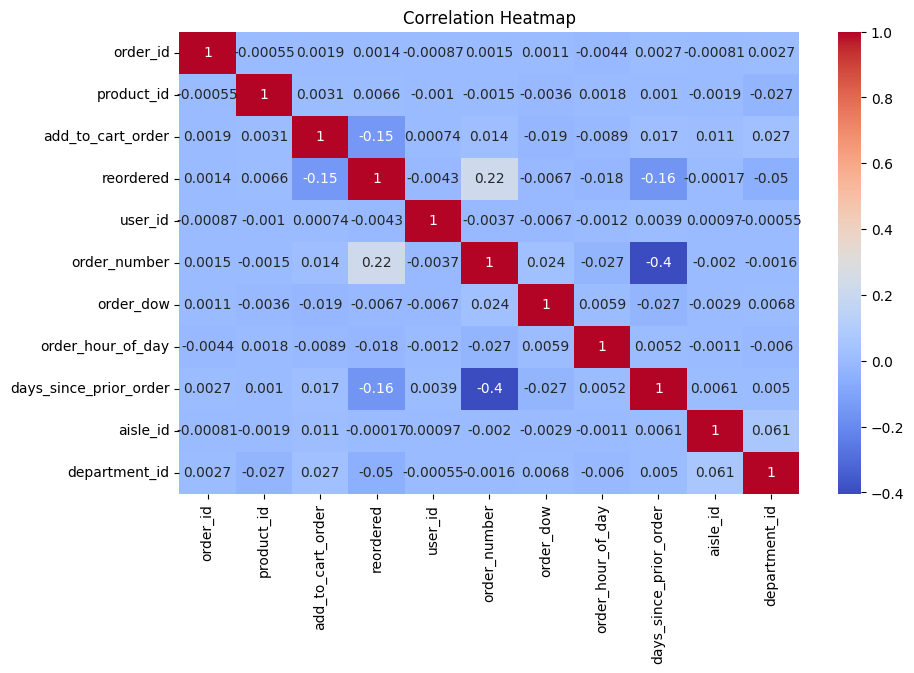

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

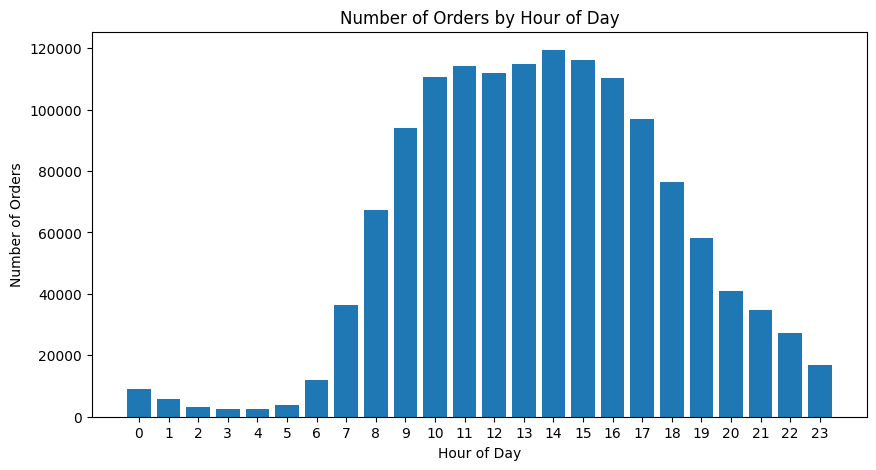

In [ ]:
import matplotlib.pyplot as plt

hour_counts = df["order_hour_of_day"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Hour of Day")
plt.xticks(range(0,24))
plt.show()


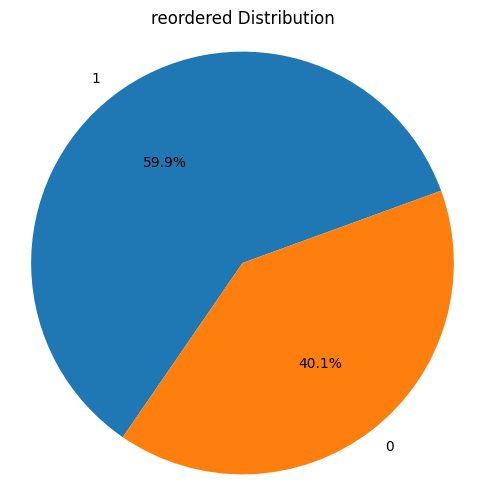

In [ ]:
gender_counts = df['reordered'].value_counts()
labeles = gender_counts.index
sizes = gender_counts.values
plt.figure(figsize = (6 , 6))
plt.pie(sizes , labels = labeles , autopct = '%1.1f%%' , startangle = 20)
plt.title('reordered Distribution')
plt.axis('equal')
plt.show()

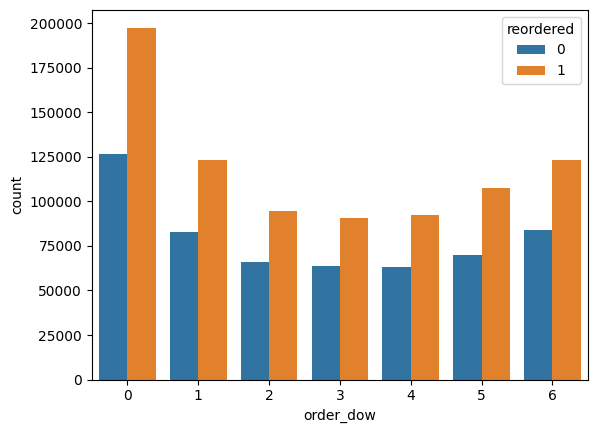

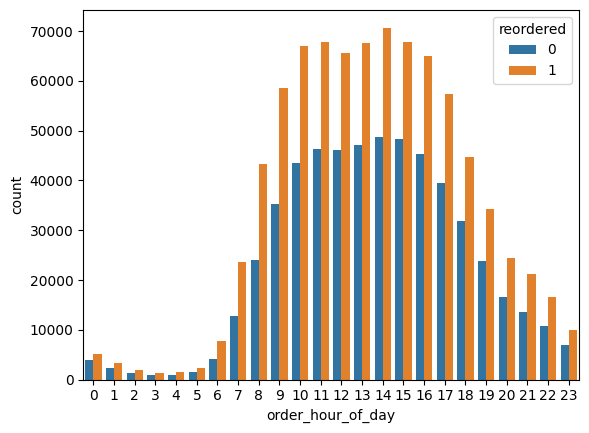

In [ ]:
#يوم الاحد هو الاكثر طلبا للمنتجات
sns.countplot(x='order_dow', hue='reordered', data=df)
plt.show()

sns.countplot(x='order_hour_of_day', hue='reordered', data=df)
plt.show()

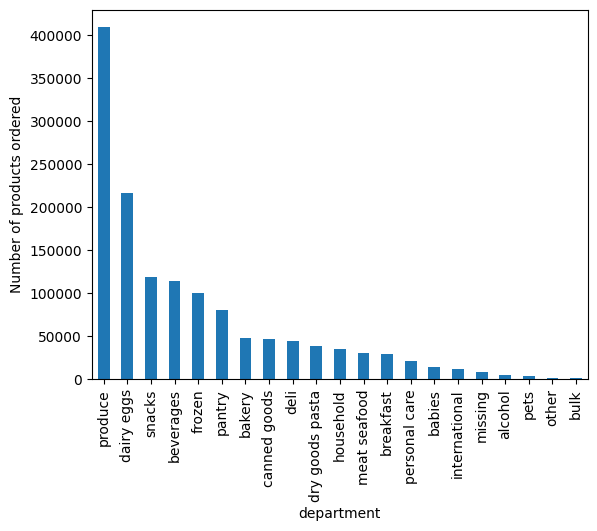

In [ ]:

df['department'].value_counts().plot(kind='bar')
plt.ylabel("Number of products ordered")
plt.show()

product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: count, dtype: int64


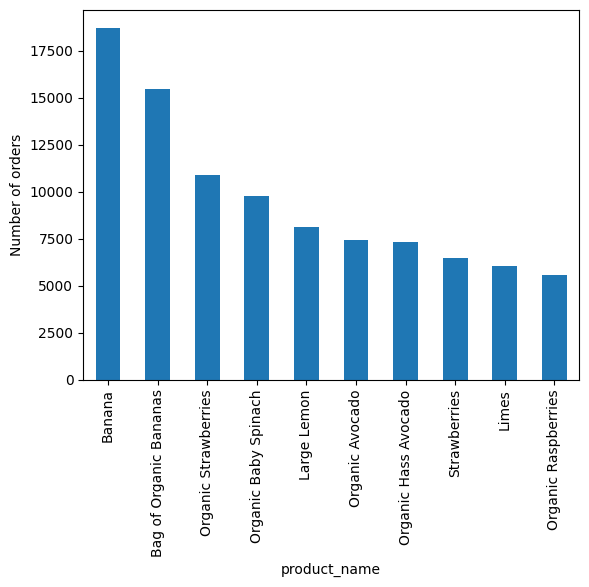

In [ ]:
top_products = df['product_name'].value_counts().head(10)
print(top_products)
top_products.plot(kind='bar')
plt.ylabel("Number of orders")
plt.show()

In [ ]:
#feature enginering
# عدد الطلبات الكلي لكل مستخدم
df["user_total_orders"] = df.groupby("user_id")["order_number"].transform("max")

# معدل إعادة الطلب لكل مستخدم
df["user_reorder_rate"] = df.groupby("user_id")["reordered"].transform("mean")

# متوسط الأيام بين الطلبات
df["user_avg_days_between_orders"] = df.groupby("user_id")[
    "days_since_prior_order"
].transform("mean")


In [ ]:
y = df["reordered"]

X = df[
    [
        "add_to_cart_order",
        "order_number",
        "order_dow",
        "order_hour_of_day",
        "days_since_prior_order",
        "aisle",
        "department",
        "user_total_orders",
        #"user_reorder_rate",
        "user_avg_days_between_orders",
    ]
]


In [ ]:
X = pd.get_dummies(X, columns=["aisle", "department"], drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(1107693, 160) (276924, 160)


In [ ]:
print("##########################################################################################################")

##########################################################################################################


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107693 entries, 1112829 to 437667
Columns: 160 entries, add_to_cart_order to department_snacks
dtypes: bool(153), float64(2), int64(5)
memory usage: 229.2 MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276924 entries, 1018875 to 4993
Columns: 160 entries, add_to_cart_order to department_snacks
dtypes: bool(153), float64(2), int64(5)
memory usage: 57.3 MB


In [ ]:
Corr_X_train = X_train.select_dtypes(include='number')
Corr_X_train.corr()

,add_to_cart_order,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders,user_avg_days_between_orders
add_to_cart_order,1.000000,0.014762,-0.019493,-0.008172,0.016570,0.014762,0.016570
order_number,0.014762,1.000000,0.024717,-0.027010,-0.403905,1.000000,-0.403905
order_dow,-0.019493,0.024717,1.000000,0.005468,-0.027023,0.024717,-0.027023
order_hour_of_day,-0.008172,-0.027010,0.005468,1.000000,0.005658,-0.027010,0.005658
days_since_prior_order,0.016570,-0.403905,-0.027023,0.005658,1.000000,-0.403905,1.000000
user_total_orders,0.014762,1.000000,0.024717,-0.027010,-0.403905,1.000000,-0.403905
user_avg_days_between_orders,0.016570,-0.403905,-0.027023,0.005658,1.000000,-0.403905,1.000000


In [ ]:
Corr_X_test = X_test.select_dtypes(include='number')
Corr_X_test.corr()

,add_to_cart_order,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders,user_avg_days_between_orders
add_to_cart_order,1.000000,0.012616,-0.018792,-0.011825,0.020133,0.012616,0.020133
order_number,0.012616,1.000000,0.023636,-0.024803,-0.403685,1.000000,-0.403685
order_dow,-0.018792,0.023636,1.000000,0.007678,-0.025735,0.023636,-0.025735
order_hour_of_day,-0.011825,-0.024803,0.007678,1.000000,0.003293,-0.024803,0.003293
days_since_prior_order,0.020133,-0.403685,-0.025735,0.003293,1.000000,-0.403685,1.000000
user_total_orders,0.012616,1.000000,0.023636,-0.024803,-0.403685,1.000000,-0.403685
user_avg_days_between_orders,0.020133,-0.403685,-0.025735,0.003293,1.000000,-0.403685,1.000000


In [ ]:
np.isnan(X_train).sum()


,0
add_to_cart_order,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
...,...
department_pantry,0
department_personal care,0
department_pets,0
department_produce,0


تجربة قيم لل pca  احسن فيمة هي ال0.95

In [ ]:

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

variances = [0.90, 0.95, 0.99]

for v in variances:
    pca = PCA(n_components=v, random_state=42)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    model.fit(X_train_pca, y_train)

    y_pred = model.predict(X_test_pca)

    print(f"Variance: {v}")
    print("Components:", pca.n_components_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("-" * 40)
# افضل اشي ال 0.95
# أفضل توازن
# أداء عالي
#تعقيد أقل

Variance: 0.9
Components: 2
Accuracy: 0.5872224870361543
F1: 0.5843254761922079
----------------------------------------
Variance: 0.95
Components: 3
Accuracy: 0.6173859976022302
F1: 0.6379871738365399
----------------------------------------
Variance: 0.99
Components: 4
Accuracy: 0.6174979416735278
F1: 0.6383315806006638
----------------------------------------


In [ ]:

from sklearn.linear_model import LogisticRegression

for C in [0.01, 0.1, 1, 5, 10]:
    model = LogisticRegression(
        C=C,
        max_iter=2000,
        class_weight='balanced',
        solver='liblinear'
    )
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    print(f"C={C}")
    print("F1:", f1_score(y_test, y_pred))
    print("-"*30)


#يقلل overfitting

#تعميم أفضل على بيانات جديدة

C=0.01
F1: 0.638333760136577
------------------------------
C=0.1
F1: 0.6383315806006638
------------------------------
C=1
F1: 0.6383315806006638
------------------------------
C=5
F1: 0.6383315806006638
------------------------------
C=10
F1: 0.6383315806006638
------------------------------


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
pca = PCA(n_components=0.95)
x_train_pca1 = pca.fit_transform(X_train_scaled)  # استخدم بيانات التدريب المقاسة
print(x_train_pca1.shape)

x_test_pca1 = pca.transform(X_test_scaled)
print(x_test_pca1.shape)

(1107693, 129)
(276924, 129)


In [ ]:
pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Original Features:", X_train.shape[1])
print("PCA Features:", X_train_pca.shape[1])


Original Features: 160
PCA Features: 129


In [ ]:
logreg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="liblinear"
)

logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.56      0.67      0.61    111159
           1       0.74      0.64      0.69    165765

    accuracy                           0.65    276924
   macro avg       0.65      0.66      0.65    276924
weighted avg       0.67      0.65      0.66    276924



In [ ]:
logreg_pca = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="liblinear"
)

logreg_pca.fit(X_train_pca, y_train)
y_pred = logreg_pca.predict(X_test_pca)

print("Logistic Regression + PCA")
print(classification_report(y_test, y_pred))


Logistic Regression + PCA
              precision    recall  f1-score   support

           0       0.55      0.68      0.61    111159
           1       0.74      0.62      0.68    165765

    accuracy                           0.65    276924
   macro avg       0.65      0.65      0.64    276924
weighted avg       0.66      0.65      0.65    276924



In [ ]:
dt = DecisionTreeClassifier(
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree")
print(classification_report(y_test, y_pred))


Decision Tree
              precision    recall  f1-score   support

           0       0.52      0.54      0.53    111159
           1       0.68      0.66      0.67    165765

    accuracy                           0.61    276924
   macro avg       0.60      0.60      0.60    276924
weighted avg       0.62      0.61      0.61    276924



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_fast = RandomForestClassifier(
    n_estimators=80,
    max_depth=15,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_fast.fit(X_train, y_train)

y_pred = rf_fast.predict(X_test)

print("Random Forest (Fast Version)")
print(classification_report(y_test, y_pred))


Random Forest (Fast Version)
              precision    recall  f1-score   support

           0       0.57      0.67      0.61    111159
           1       0.75      0.65      0.70    165765

    accuracy                           0.66    276924
   macro avg       0.66      0.66      0.66    276924
weighted avg       0.68      0.66      0.66    276924



In [ ]:
dt = DecisionTreeClassifier(
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train_pca, y_train)
y_pred = dt.predict(X_test_pca)

print("Decision Tree")
print(classification_report(y_test, y_pred))


Decision Tree
              precision    recall  f1-score   support

           0       0.51      0.53      0.52    111159
           1       0.68      0.66      0.67    165765

    accuracy                           0.61    276924
   macro avg       0.59      0.59      0.59    276924
weighted avg       0.61      0.61      0.61    276924



In [ ]:

svc = SVC(
    kernel="rbf",
    probability=True,
    class_weight="balanced"
)

svc.fit(X_train_pca, y_train)
y_pred = svc.predict(X_test_pca)

print("SVM (RBF)")
print(classification_report(y_test, y_pred))


'\nsvc = SVC(\n    kernel="rbf",\n    probability=True,\n    class_weight="balanced"\n)\n\nsvc.fit(X_train_pca, y_train)\ny_pred = svc.predict(X_test_pca)\n\nprint("SVM (RBF)")\nprint(classification_report(y_test, y_pred))\n'

In [ ]:

# Initialize the linear SVC model
svc_lin = SVC(kernel='linear')

# Train the model
svc_lin.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = svc_lin.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


"\n# Initialize the linear SVC model\nsvc_lin = SVC(kernel='linear')\n\n# Train the model\nsvc_lin.fit(X_train_pca, y_train)\n\n# Make predictions on the test set\ny_pred = svc_lin.predict(X_test_pca)\n\n# Evaluate the model\nprint(classification_report(y_test, y_pred))\nprint(confusion_matrix(y_test, y_pred))\nprint(accuracy_score(y_test, y_pred))\n"